<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/GO%20Transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metrolinx Data Analysis ("First Look")

## Import Libraries

In [0]:
import pandas as pd

## Read Data Files

In [22]:
# Load data from Excel file into Pandas DataFrame:
path = 'https://github.com/Jenarth/SCS3250-Group-2-Final-Project/raw/master/GO%20Train%20Boardings_2017-2020.xlsx'
boardings = pd.read_excel(path, 
                          skiprows=1, # skip blank first row
                          usecols=range(26), # no data beyond column 25 (26th column)
                          parse_dates=[1]) # dates in column 1 (2nd column)

# List columns:
boardings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69094 entries, 0 to 69093
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Origin  69094 non-null  object        
 1   Date    69094 non-null  datetime64[ns]
 2   12AM    27381 non-null  float64       
 3   1AM     14521 non-null  float64       
 4   2AM     4294 non-null   float64       
 5   3AM     2535 non-null   float64       
 6   4AM     12866 non-null  float64       
 7   5AM     46922 non-null  float64       
 8   6AM     59113 non-null  float64       
 9   7AM     61954 non-null  float64       
 10  8AM     63100 non-null  float64       
 11  9AM     63702 non-null  float64       
 12  10AM    58368 non-null  float64       
 13  11AM    57093 non-null  float64       
 14  12PM    55188 non-null  float64       
 15  1PM     55418 non-null  float64       
 16  2PM     54763 non-null  float64       
 17  3PM     58323 non-null  float64       
 18  4PM   

In [23]:
# View basic stats:
# !!! Note fractional boarding times!
boardings.describe()

,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
count,27381.000000,14521.000000,4294.000000,2535.000000,12866.000000,46922.000000,59113.000000,61954.000000,63100.000000,63702.000000,58368.000000,57093.000000,55188.000000,55418.000000,54763.000000,58323.000000,60503.000000,63552.000000,62650.000000,58958.000000,52024.000000,43032.000000,39708.000000,35913.000000
mean,3.051061,0.786386,0.541258,0.330018,1.483531,9.084917,37.388391,72.269468,38.386135,8.244689,6.734423,6.789881,7.316999,8.059810,10.317160,24.559933,60.281879,56.580424,19.886597,9.377002,6.302798,6.717044,6.739661,5.451131
std,14.819209,3.602854,1.735118,0.972161,3.174297,10.524733,38.587522,78.294051,45.997446,10.511455,9.804487,13.375282,21.866913,29.967103,47.773934,162.297778,465.805895,443.642606,134.127596,55.504257,32.146693,31.748613,34.082614,28.462944
min,-0.270000,-0.405000,-0.270000,0.000000,0.000000,0.000000,0.000000,-1.620000,-49.815000,-12.285000,-2.160000,-0.945000,-0.405000,-0.270000,-1.350000,-0.810000,-0.540000,-0.270000,-8.910000,-0.810000,-0.270000,-0.405000,-0.270000,-0.270000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.215000,6.345000,6.750000,3.780000,0.540000,0.675000,0.540000,0.405000,0.405000,0.405000,0.540000,0.675000,0.675000,0.540000,0.270000,0.000000,0.270000,0.270000,0.000000
50%,0.270000,0.000000,0.000000,0.000000,0.270000,5.265000,23.625000,41.445000,24.300000,4.050000,3.375000,2.835000,2.565000,2.295000,2.565000,2.835000,2.700000,2.295000,1.485000,0.945000,0.810000,1.215000,0.945000,0.540000
75%,0.540000,0.270000,0.405000,0.405000,0.945000,14.445000,55.215000,125.685000,53.325000,12.555000,9.180000,8.370000,7.695000,7.155000,7.020000,8.775000,10.800000,11.070000,6.480000,3.645000,2.970000,2.835000,2.025000,1.080000
max,547.965000,122.850000,58.050000,26.190000,24.300000,72.090000,203.850000,404.460000,367.605000,156.330000,115.560000,268.110000,873.585000,1342.710000,2432.025000,3805.380000,5229.765000,4945.995000,1673.325000,926.505000,436.590000,464.670000,566.865000,679.185000


In [24]:
# Determine date range:
# !!! Covers all 1096 days (365*3 + leap day) between 2017-03-01 and 2020-02-29.
boardings.Date.describe()

count                   69094
unique                   1096
top       2019-04-02 00:00:00
freq                       68
first     2017-03-01 00:00:00
last      2020-02-29 00:00:00
Name: Date, dtype: object

## Correct/Enhance Data

* Replace NaN with zeros
* Apply a correction factor to handle fractional boardings (due to data alterations at source for confidentiality)
* Convert float columns to integer
* Add daily_total column for sum of hourly columns
* Add year_month and week columns to facilitate data aggregation

### Replace NaN with zeros

In [25]:
# Replace NaNs with zeros:
boardings.fillna(value=0, inplace=True)
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,Acton GO,2017-03-01,0.0,0.0,0.0,0.0,0.0,0.27,6.885,5.265,0.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,Acton GO,2017-03-02,0.0,0.0,0.0,0.0,0.0,0.00,6.615,3.645,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.27,0.0,0.0,0.0,0.0,0.0
2,Acton GO,2017-03-03,0.0,0.0,0.0,0.0,0.0,0.27,5.400,4.050,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0
3,Acton GO,2017-03-04,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,Acton GO,2017-03-05,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [26]:
# Print out all column names (as input to creating a named list):
boardings.columns

Index(['Origin', 'Date', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM',
       '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM',
       '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'],
      dtype='object')

In [0]:
# Create a named list of just the hourly columns:
time_column_list = ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM',
       '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM',
       '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM']

In [28]:
# Confirm list has all hourly colums:
print(len(time_column_list),'columns:')
boardings[time_column_list].head()

24 columns:


,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,0.0,0.0,0.0,0.0,0.0,0.27,6.885,5.265,0.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,6.615,3.645,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.27,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.27,5.400,4.050,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


### Apply a correction factor to handle fractional boardings

In [29]:
# Apply corrective factor to shift all values (manipulated at source for confidentiality) to whole numbers:
boardings[time_column_list]=boardings[time_column_list]/.135
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,Acton GO,2017-03-01,0.0,0.0,0.0,0.0,0.0,2.0,51.0,39.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acton GO,2017-03-02,0.0,0.0,0.0,0.0,0.0,0.0,49.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,Acton GO,2017-03-03,0.0,0.0,0.0,0.0,0.0,2.0,40.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acton GO,2017-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acton GO,2017-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Convert float columns to integer

In [30]:
# Convert float columns to int (boardings can't be fractional):
boardings[time_column_list] = boardings[time_column_list].astype(int)
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


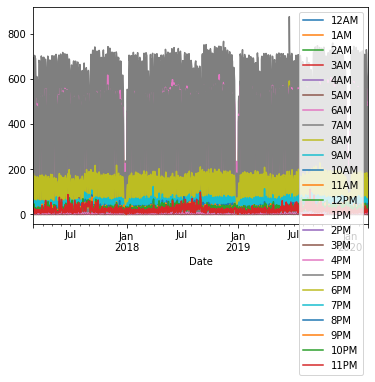

In [31]:
boardings.groupby(['Date']).mean().plot()

### Add daily_total column for sum of hourly columns

In [32]:
#Add new column for daily totals:
boardings['daily_total'] = boardings[time_column_list].agg('sum', axis='columns')
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


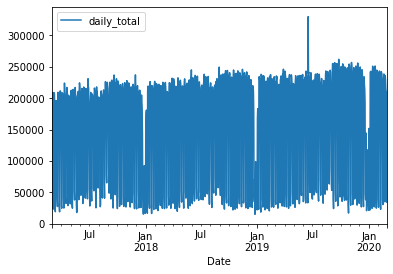

In [33]:
boardings[['Date', 'daily_total']].groupby(by='Date').sum().plot()

In [34]:
boardings.head(25)

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Acton GO,2017-03-06,0,0,0,0,0,3,46,41,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,93
6,Acton GO,2017-03-07,0,0,0,0,0,3,50,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87
7,Acton GO,2017-03-08,0,0,0,0,0,4,51,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93
8,Acton GO,2017-03-09,0,0,0,0,0,4,52,37,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,95
9,Acton GO,2017-03-10,0,0,0,0,0,2,32,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76


### Add year_month and week columns to facilitate data aggregation

In [35]:
# Preview monthly periods:
boardings['Date'].dt.to_period('M').head()

0    2017-03
1    2017-03
2    2017-03
3    2017-03
4    2017-03
Name: Date, dtype: period[M]

In [36]:
# Add a year-month column for monthly summaries:
boardings['year_month'] = boardings['Date'].dt.to_period('M')
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total,year_month
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,2017-03
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76,2017-03
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73,2017-03
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03


In [38]:
# Preview weekly periods:
boardings['Date'].dt.to_period('W').head()

0    2017-02-27/2017-03-05
1    2017-02-27/2017-03-05
2    2017-02-27/2017-03-05
3    2017-02-27/2017-03-05
4    2017-02-27/2017-03-05
Name: Date, dtype: period[W-SUN]

In [39]:
# Add a week column for monthly summaries:
boardings['week'] = boardings['Date'].dt.to_period('W')
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total,year_month,week
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,2017-03,2017-02-27/2017-03-05
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76,2017-03,2017-02-27/2017-03-05
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73,2017-03,2017-02-27/2017-03-05
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03,2017-02-27/2017-03-05
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03,2017-02-27/2017-03-05


## Visualizations

### Monthly Totals and Averages

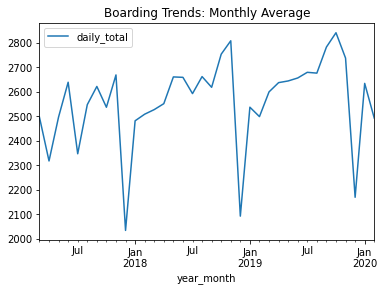

In [40]:
boardings[['year_month', 'daily_total']].groupby(['year_month']).mean().plot(title='Boarding Trends: Monthly Average')

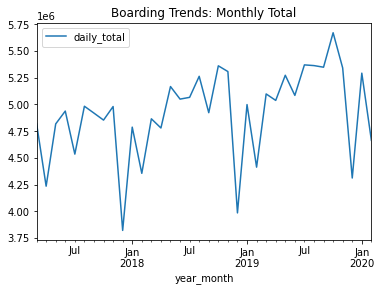

In [41]:
boardings[['year_month', 'daily_total']].groupby(['year_month']).sum().plot(title='Boarding Trends: Monthly Total')

### Weekly Totals and Averages

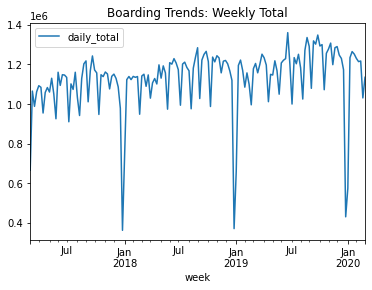

In [0]:
boardings[['week', 'daily_total']].groupby(['week']).sum().plot(title='Boarding Trends: Weekly Total')

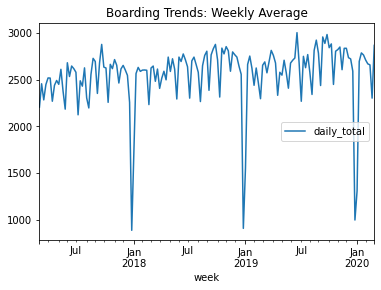

In [0]:
boardings[['week', 'daily_total']].groupby(['week']).mean().plot(title='Boarding Trends: Weekly Average')